In [56]:
import pandas as pd
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import geopandas as gpd
drive.mount('/content/drive')
import matplotlib.colors as mcolors
import matplotlib.cm as cm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
refugiados_df = pd.read_csv('https://drive.google.com/uc?id=1MG_KQW5o8Bz9vztXjZn0l9yLBnKnl3e_',  sep=",")
refugiados_df

,Country,Number of Refugees (dec/2024)
0,Albania,6465
1,Egypt,9
2,Argentina,161
3,Armenia,715
4,Australia,1055
...,...,...
75,United Rep. of Tanzania,12
76,Tunisia,11
77,Turkey,2928
78,Uruguay,18


In [58]:
import gdown
import geopandas as gpd

file_ids = [
    "1u_5ROls_7B0RGFhH68fVQ1uyQefHGsmS",
    "1r-skXHDImG9sGBbd-DaYbZuw3KS5Eq2C",
    "1NpwBJ5g4vLNrRj3xYpEDsD9-s1vjk_RJ",
    "1_ijKBcguw4Zd8xEZq35g2zhZLDl6498C",
    "1S5ZHcHOZ6r9k1dVsJxUCQ6gxGzrN9yL7"
]

for file_id in file_ids:
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, quiet=False)

map_df = gpd.read_file("world-administrative-boundaries.shp")
map_df.head()


Downloading...
From: https://drive.google.com/uc?id=1u_5ROls_7B0RGFhH68fVQ1uyQefHGsmS
To: /content/world-administrative-boundaries.cpg
100%|██████████| 5.00/5.00 [00:00<00:00, 11.1kB/s]
Downloading...
From: https://drive.google.com/uc?id=1r-skXHDImG9sGBbd-DaYbZuw3KS5Eq2C
To: /content/world-administrative-boundaries.dbf
100%|██████████| 523k/523k [00:00<00:00, 81.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NpwBJ5g4vLNrRj3xYpEDsD9-s1vjk_RJ
To: /content/world-administrative-boundaries.prj
100%|██████████| 143/143 [00:00<00:00, 176kB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ijKBcguw4Zd8xEZq35g2zhZLDl6498C
To: /content/world-administrative-boundaries.shp
100%|██████████| 3.50M/3.50M [00:00<00:00, 149MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S5ZHcHOZ6r9k1dVsJxUCQ6gxGzrN9yL7
To: /content/world-administrative-boundaries.shx
100%|██████████| 2.15k/2.15k [00:00<00:00, 4.11MB/s]


,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.9211 -1.00194, 33.92027 -1.00111,..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."
2,IRL,Member State,IRL,Ireland,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53..."
3,ERI,Member State,ERI,Eritrea,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.7525, 40.12861 15...."
4,None,UK Territory,GBR,South Georgia & the South Sandwich Islands,Antarctica,None,None,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889..."


<Axes: >

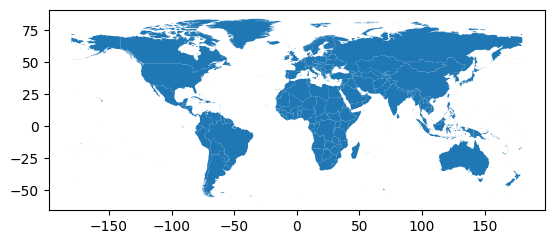

In [59]:
map_df.plot()

In [60]:
merged = map_df.set_index("name").join(refugiados_df.set_index("Country"))
merged.head()

,iso3,status,color_code,continent,region,iso_3166_1_,french_shor,geometry,Number of Refugees (dec/2024)
name,,,,,,,,,
Uganda,UGA,Member State,UGA,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.9211 -1.00194, 33.92027 -1.00111,...",NaN
Uzbekistan,UZB,Member State,UZB,Asia,Central Asia,UZ,Ouzbékistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205...",NaN
Ireland,IRL,Member State,IRL,Europe,Northern Europe,IE,Irlande,"MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...",105719.0
Eritrea,ERI,Member State,ERI,Africa,Eastern Africa,ER,Érythrée,"MULTIPOLYGON (((40.13583 15.7525, 40.12861 15....",NaN
South Georgia & the South Sandwich Islands,None,UK Territory,GBR,Antarctica,None,None,South Georgia & the South Sandwich Islands,"MULTIPOLYGON (((-26.24361 -58.49473, -26.24889...",NaN


<Axes: >

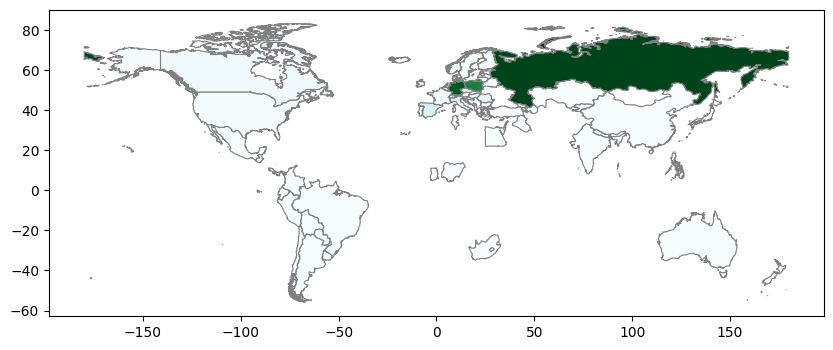

In [61]:
variable = "Number of Refugees (dec/2024)"
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable, cmap="BuGn", linewidth=0.8, ax=ax, edgecolor="0.5")

In [62]:
refugiados_df.sort_values(by=['Number of Refugees (dec/2024)'])

,Country,Number of Refugees (dec/2024)
67,South Africa,5
37,Iraq,5
57,Nigeria,5
29,Ghana,5
44,Libya,5
...,...,...
26,United Kingdom of Great Britain and Northern I...,244718
19,Czechia,359632
64,Poland,966117
28,Germany,1144229


<Axes: >

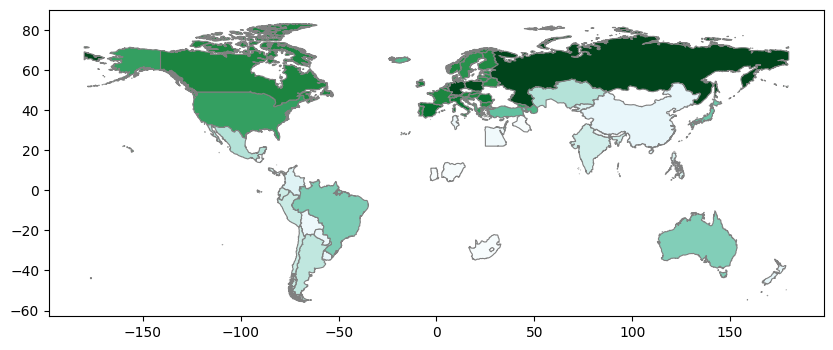

In [63]:
merged['logarithm_base2'] = np.log10(merged[variable])


variable = "Number of Refugees (dec/2024)"
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))

merged.plot(column="logarithm_base2", cmap="BuGn", linewidth=0.8, ax=ax, edgecolor="0.5")

<ipython-input-64-4bdccfe69b52>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("BuGn")


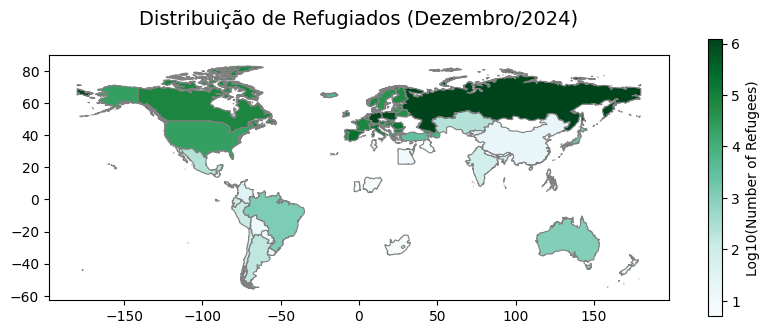

In [64]:
variable = "Number of Refugees (dec/2024)"
vmin, vmax = 120, 220

# Criar a figura e o eixo
fig, ax = plt.subplots(1, figsize=(10, 6))

# Calcular a escala logarítmica
merged['logarithm_base2'] = np.log10(merged[variable])

# Criar um colormap e normalização
cmap = cm.get_cmap("BuGn")
norm = mcolors.Normalize(vmin=merged["logarithm_base2"].min(), vmax=merged["logarithm_base2"].max())

# Plotar o mapa
merged.plot(column="logarithm_base2", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="0.5")

# Adicionar a barra de cores
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Necessário para evitar erro
cbar = fig.colorbar(sm, ax=ax, shrink=0.6)
cbar.set_label("Log10(Number of Refugees)")

ax.set_title("Distribuição de Refugiados (Dezembro/2024)\n", fontsize=14)

# Mostrar o gráfico
plt.show()


<ipython-input-65-919e1dc09582>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['logarithm_base10'].replace(-np.inf, np.nan, inplace=True)
<ipython-input-65-919e1dc09582>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("BuGn")


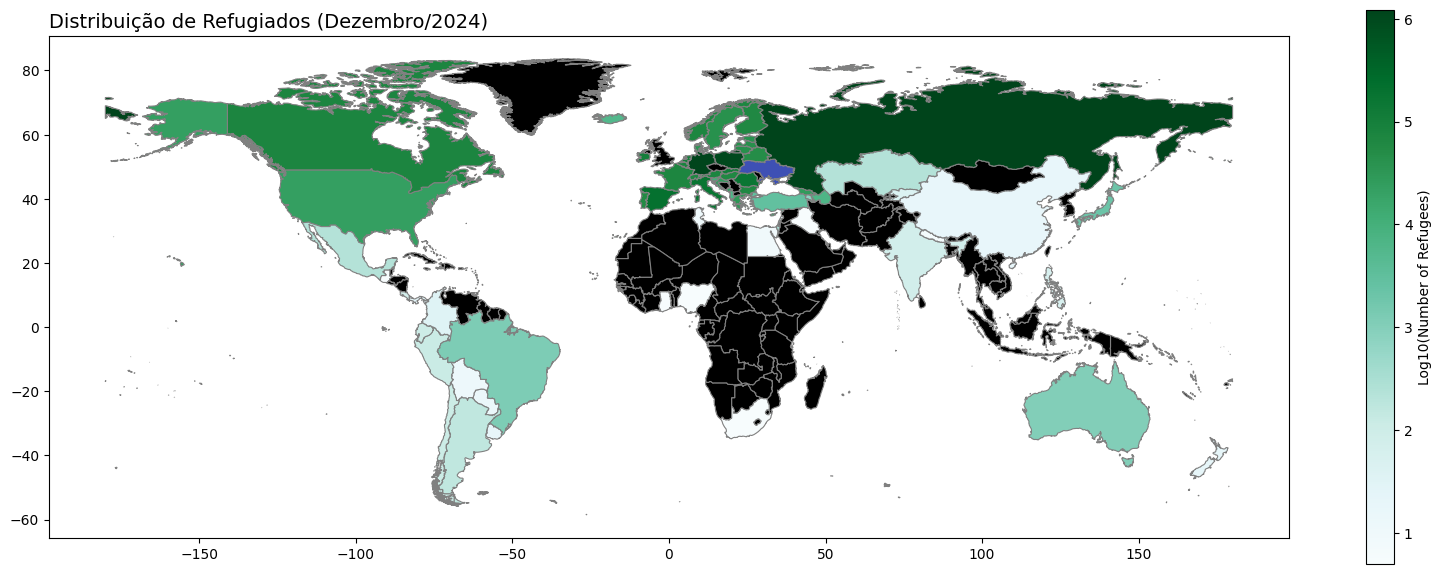

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Variável para coloração
variable = "Number of Refugees (dec/2024)"
vmin, vmax = 120, 220

fig, ax = plt.subplots(1, figsize=(20, 12))

# Lidar com NaNs no logaritmo
merged['logarithm_base10'] = np.log10(merged[variable])
merged['logarithm_base10'].replace(-np.inf, np.nan, inplace=True)

# Criar uma coluna de cores personalizada
cmap = cm.get_cmap("BuGn")
norm = mcolors.Normalize(vmin=merged["logarithm_base10"].min(), vmax=merged["logarithm_base10"].max())

# Criar um mapeamento de cores normal
merged["color_column"] = merged["logarithm_base10"].map(lambda x: cmap(norm(x)) if not np.isnan(x) else "black")

# Destacar a Ucrânia
merged.loc[merged.index == "Ukraine", "color_column"] = "#3e50b4"

# Plotar com a cor personalizada
merged.plot(color=merged["color_column"], linewidth=0.8, ax=ax, edgecolor="0.5")

# Barra de cores
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Necessário para evitar erro
cbar = fig.colorbar(sm, ax=ax, shrink=0.6)
cbar.set_label("Log10(Number of Refugees)")

# Título
ax.set_title("Distribuição de Refugiados (Dezembro/2024)", fontsize=14, loc="left")

plt.show()
